In [75]:
import pickle
import matplotlib.pylab as plt

## Load from raw data (on server only)

In [76]:
with open("/export/share/krausef99dm/data/ptr_data/ptr_data.pkl", 'rb') as f:
    ordered_dict = pickle.load(f)

seq_lens_all = [len(ordered_dict[idx]["fasta"]) for idx in list(ordered_dict.keys())]  # can also add set inside of list()

In [77]:
path_seq_train = "/export/share/krausef99dm/data/data_train/train_9.0k_data.pkl"
path_seq_val = "/export/share/krausef99dm/data/data_test/val_9.0k_data.pkl"
path_seq_test = "/export/share/krausef99dm/data/data_test/test_9.0k_data.pkl"

path_cod_train = "/export/share/krausef99dm/data/data_train/codon_train_2.7k_data.pkl"
path_cod_val = "/export/share/krausef99dm/data/data_test/codon_val_2.7k_data.pkl"
path_cod_test = "/export/share/krausef99dm/data/data_test/codon_test_2.7k_data.pkl"

In [78]:
def load_rna_data(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def get_seq_lens(path):
    rna_data, _, _, _ = load_rna_data(path_seq_train)
    return [len(array) for array in rna_data]

In [79]:
seq_train = get_seq_lens(path_seq_train)
seq_val = get_seq_lens(path_seq_val)
seq_test = get_seq_lens(path_seq_test)

cod_train = get_seq_lens(path_cod_train) * 3
cod_val = get_seq_lens(path_cod_val) * 3
cod_test = get_seq_lens(path_cod_test) * 3

In [80]:
# pickle to data in vis
data_list = [seq_lens_all, seq_train, seq_val, seq_test, cod_train, cod_val, cod_test]

# Save to a pickle file on server
with open("data/seq_len_data.pkl", "wb") as f:
    pickle.dump(data_list, f)

## Load from checkpoint

In [71]:
# Load from the pickle file
with open("data/seq_len_data.pkl", "rb") as f:
    loaded_data = pickle.load(f)

# Unpack the data
seq_lens_all, seq_train, seq_val, seq_test, cod_train, cod_val, cod_test = loaded_data

## Analysis

In [72]:
initial_len = len(seq_lens_all)
print(initial_len)
# seq longer than 20k

11208


In [73]:
max(seq_lens_all)

14984

In [74]:
# remove above specific threshold
seq_lens_all = [l for l in seq_lens_all if l < 15_000]

print("new len", len(seq_lens_all))
print("Lost sequence-tissue tuples:", initial_len - len(seq_lens_all))

new len 11208
Lost sequence-tissue tuples: 0


(array([ 467.,  893., 1220., 1400., 1200., 1003.,  872.,  718.,  644.,
         496.,  431.,  348.,  267.,  213.,  172.,  166.,  134.,   96.,
          86.,   75.,   55.,   62.,   38.,   29.,   24.,   31.,   24.,
          14.,   18.,   12.]),
 array([  303.        ,   792.36666667,  1281.73333333,  1771.1       ,
         2260.46666667,  2749.83333333,  3239.2       ,  3728.56666667,
         4217.93333333,  4707.3       ,  5196.66666667,  5686.03333333,
         6175.4       ,  6664.76666667,  7154.13333333,  7643.5       ,
         8132.86666667,  8622.23333333,  9111.6       ,  9600.96666667,
        10090.33333333, 10579.7       , 11069.06666667, 11558.43333333,
        12047.8       , 12537.16666667, 13026.53333333, 13515.9       ,
        14005.26666667, 14494.63333333, 14984.        ]),
 <BarContainer object of 30 artists>)

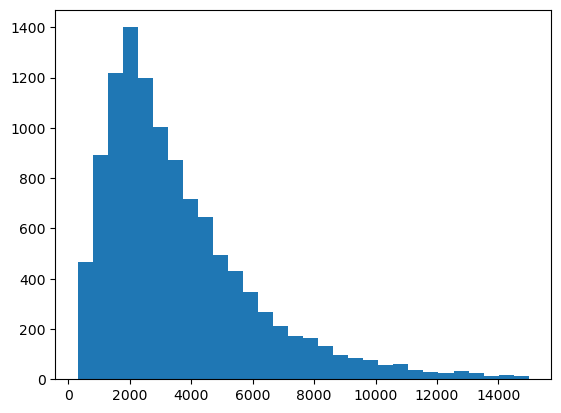

In [7]:
plt.hist(seq_lens_all, bins=30)

In [38]:
blue_shades = [
    "#B2E8F6",  # Aqua blue
    # "#8ED4F3",  # Soft cyan
    "#72C6ED",  # Light turquoise
    # "#5AB4E4",  # Sky blue
    "#43A3DC",  # Medium blue
    # "#338ECF",  # Cerulean
    "#2679C0",  # Rich blue
    # "#1964A8",  # Deep aqua blue
    #"#0F5094",  # Slightly darker blue
]

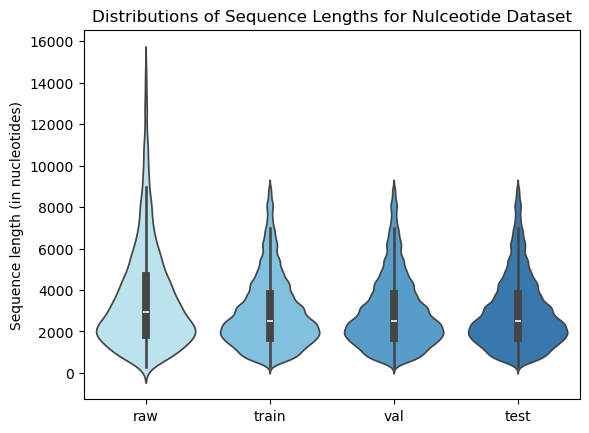

In [65]:
import seaborn as sns
#from custom_colors import blue_shades

# NUCLEOTIDE DATA
data = [seq_lens_all, seq_train, seq_val, seq_test]
labels = ['raw', 'train', 'val', "test"]
sns.violinplot(data=data, palette=blue_shades)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.title("Distributions of Sequence Lengths for Nulceotide Dataset")
plt.ylabel("Sequence length (in nucleotides)")

# store at assets/data_viz/sequence_len_distribution_codon.pdf

plt.show()

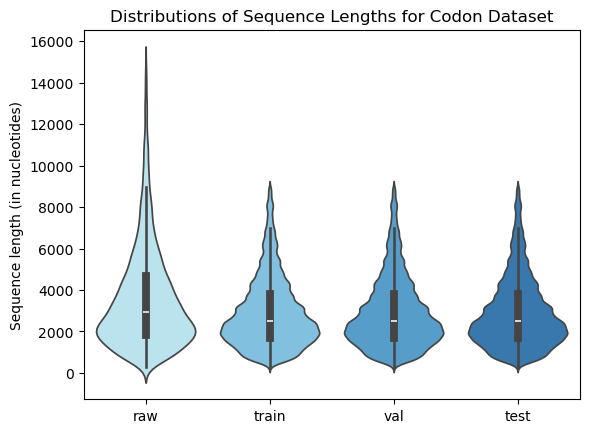

In [66]:
# CODON DATA

data = [seq_lens_all, cod_train, cod_val, cod_test]
labels = ['raw', 'train', 'val', "test"]
sns.violinplot(data=data, palette=blue_shades)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.title("Distributions of Sequence Lengths for Codon Dataset")
plt.ylabel("Sequence length (in nucleotides)")

# store at assets/data_viz/sequence_len_distribution_nucl.pdf

plt.show()